In [2]:
# Instalasi library
!pip install google-play-scraper pandas

In [31]:
# Import library
from google_play_scraper import Sort, reviews
import pandas as pd
import re

In [19]:
# Mengambil data ulasan Gojek
result, continuation_token = reviews(
    'com.gojek.app',       # ID aplikasi Gojek di Play Store
    lang='id',             # Bahasa Indonesia
    country='id',          # Negara Indonesia
    sort=Sort.NEWEST,      # Urutkan dari yang terbaru
    count=1000            # Ambil 1000 ulasan
)

In [20]:
# Ubah ke DataFrame
df = pd.DataFrame(result)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,7216c4f5-85b4-4a2e-b776-a98da4b62f71,Erfinade Ermawann,https://play-lh.googleusercontent.com/a/ACg8oc...,"driver gada attitude, serasa dunia dia yang pu...",1,0,None,2025-10-28 10:14:50,"Hai Kak Erfinade, mohon maaf atas ketidaknyama...",2025-10-28 10:43:25,None
1,ab007fad-306d-4c5d-8ec2-f3c7b6fef930,Rahyuni Yuni,https://play-lh.googleusercontent.com/a/ACg8oc...,app nya kurang oke. hanya nyilsa driver aja,1,0,5.36.2,2025-10-28 10:13:45,None,NaT,5.36.2
2,e23caa9f-a64b-4e61-a8d0-b7ea16fc717f,Maulana Susan,https://play-lh.googleusercontent.com/a-/ALV-U...,mantaaap,5,0,None,2025-10-28 09:39:14,None,NaT,None
3,5ea8c31e-4446-43aa-a7a3-8055b9f1d590,Reyhan Fitria Prasasti,https://play-lh.googleusercontent.com/a/ACg8oc...,sering eror,1,0,None,2025-10-28 09:15:17,None,NaT,None
4,dd41cbb6-42e9-4a97-8a16-897ff9b11b7c,Khoirun Nisa,https://play-lh.googleusercontent.com/a/ACg8oc...,sangat nyaman drivernya baik. siiiiipppppp sem...,5,0,5.36.2,2025-10-28 09:00:25,None,NaT,5.36.2
...,...,...,...,...,...,...,...,...,...,...,...
995,36b50a2a-534a-4285-a21f-e9114d52a1db,Billy Kaunang,https://play-lh.googleusercontent.com/a/ACg8oc...,sangat membantu,5,0,5.35.1,2025-10-20 14:09:07,None,NaT,5.35.1
996,075907cd-ff90-49d4-94b6-cf09fdde53cd,3R CHANEL,https://play-lh.googleusercontent.com/a-/ALV-U...,mantap,5,0,5.36.1,2025-10-20 14:07:03,None,NaT,5.36.1
997,5c592591-2bdd-4242-8562-3ed9364b9a54,Riena Mutiarawati,https://play-lh.googleusercontent.com/a-/ALV-U...,Drivernya ramah dan sopan....trm ksh 🙏🏽,5,0,5.35.1,2025-10-20 14:00:11,None,NaT,5.35.1
998,61770bde-dab8-4042-a6a3-08dd70b08d5e,Kubu Subali,https://play-lh.googleusercontent.com/a-/ALV-U...,mantapp,5,0,5.35.1,2025-10-20 13:53:57,None,NaT,5.35.1


In [22]:
df.to_csv('C:/Users/asus/Documents/BELAJAR/gojek_reviews.csv', index=False)
print("Data berhasil disimpan!")

Data berhasil disimpan!


In [25]:
# Baca data hasil scraping
df = pd.read_csv('C:/Users/asus/Documents/BELAJAR/gojek_reviews.csv')

# Tampilkan 5 data pertama
df[['userName', 'score', 'content']].head()

,userName,score,content
0,Erfinade Ermawann,1,"driver gada attitude, serasa dunia dia yang pu..."
1,Rahyuni Yuni,1,app nya kurang oke. hanya nyilsa driver aja
2,Maulana Susan,5,mantaaap
3,Reyhan Fitria Prasasti,1,sering eror
4,Khoirun Nisa,5,sangat nyaman drivernya baik. siiiiipppppp sem...


In [30]:
# Cek data kosong
df.isnull().sum()

# Hapus baris yang tidak ada teks ulasannya
df = df.dropna(subset=['content'])
df = df.reset_index(drop=True)

In [32]:
def clean_text(text):
    text = str(text).lower()  # ubah jadi huruf kecil
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # hapus simbol dan angka
    text = re.sub(r'\s+', ' ', text)  # hapus spasi berlebih
    text = text.strip()
    return text

df['cleaned'] = df['content'].apply(clean_text)
df[['content', 'cleaned']].head(10)


,content,cleaned
0,"driver gada attitude, serasa dunia dia yang pu...",driver gada attitude serasa dunia dia yang pun...
1,app nya kurang oke. hanya nyilsa driver aja,app nya kurang oke hanya nyilsa driver aja
2,mantaaap,mantaaap
3,sering eror,sering eror
4,sangat nyaman drivernya baik. siiiiipppppp sem...,sangat nyaman drivernya baik siiiiipppppp semo...
5,selalu ada disaat dibutuhkan...mantab 👍,selalu ada disaat dibutuhkan mantab
6,saya cari cari untuk menu layanan customer kok...,saya cari cari untuk menu layanan customer kok...
7,sesuai standar,sesuai standar
8,kenapa kalo gofood lama terus gak gercep yaa,kenapa kalo gofood lama terus gak gercep yaa
9,Cintai dan gunakanlah Produk-produk Anak Bangs...,cintai dan gunakanlah produk produk anak bangs...


In [33]:
!pip install Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopwords = set(factory.get_stop_words())

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stopwords])

df['no_stopwords'] = df['cleaned'].apply(remove_stopwords)
df[['cleaned', 'no_stopwords']].head(10)


,cleaned,no_stopwords
0,driver gada attitude serasa dunia dia yang pun...,driver gada attitude serasa dunia punya lalu k...
1,app nya kurang oke hanya nyilsa driver aja,app nya kurang oke nyilsa driver aja
2,mantaaap,mantaaap
3,sering eror,sering eror
4,sangat nyaman drivernya baik siiiiipppppp semo...,sangat nyaman drivernya baik siiiiipppppp semo...
5,selalu ada disaat dibutuhkan mantab,selalu disaat dibutuhkan mantab
6,saya cari cari untuk menu layanan customer kok...,cari cari menu layanan customer kok ga yaa pes...
7,sesuai standar,sesuai standar
8,kenapa kalo gofood lama terus gak gercep yaa,kalo gofood lama terus gak gercep yaa
9,cintai dan gunakanlah produk produk anak bangs...,cintai gunakanlah produk produk anak bangsa in...


In [34]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

df['stemmed'] = df['no_stopwords'].apply(lambda x: stemmer.stem(x))
df[['no_stopwords', 'stemmed']].head(10)


,no_stopwords,stemmed
0,driver gada attitude serasa dunia punya lalu k...,driver gada attitude serasa dunia punya lalu k...
1,app nya kurang oke nyilsa driver aja,app nya kurang oke nyilsa driver aja
2,mantaaap,mantaaap
3,sering eror,sering eror
4,sangat nyaman drivernya baik siiiiipppppp semo...,sangat nyaman drivernya baik siiiiipppppp moga...
5,selalu disaat dibutuhkan mantab,selalu saat butuh mantab
6,cari cari menu layanan customer kok ga yaa pes...,cari cari menu layan customer kok ga yaa sen g...
7,sesuai standar,sesuai standar
8,kalo gofood lama terus gak gercep yaa,kalo gofood lama terus gak gercep yaa
9,cintai gunakanlah produk produk anak bangsa in...,cinta guna produk produk anak bangsa indonesia...


In [35]:
df.to_csv('C:/Users/asus/Documents/BELAJAR/gojek_cleaned.csv', index=False)
print("Data hasil pembersihan disimpan ke data")

Data hasil pembersihan disimpan ke data


In [36]:
!pip install inset
!pip install matplotlib seaborn wordcloud

In [44]:
import pandas as pd      # untuk olah data ulasan
import matplotlib.pyplot as plt  # untuk grafik
import seaborn as sns    # untuk visualisasi modern
from wordcloud import WordCloud  # untuk visualisasi kata paling sering

In [39]:
!pip install transformers torch

   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.0 MB 12.1 MB/s eta 0:00:01
   ---------- ----------------------------- 3.1/12.0 MB 9.3 MB/s eta 0:00:01
   -------------------- ------------------- 6.0/12.0 MB 10.9 MB/s eta 0:00:01
   --------------------------- ------------ 8.4/12.0 MB 11.4 MB/s eta 0:00:01
   ------------------------------------- -- 11.3/12.0 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 12.0/12.0 MB 11.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/566.1 kB ? eta -:--:--
   ---------------------------------------- 566.1/566.1 kB 8.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------------------------------- ---- 2.4/2.7 MB 11.4 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 10.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/109.3 MB ? eta -:--:--
   - -----------

In [45]:
from transformers import pipeline

# Ganti dengan model yang tersedia publik
sentiment_model = pipeline("sentiment-analysis", model="mdhugol/indonesia-bert-sentiment-classification")

Device set to use cpu


In [58]:
# Mapping label ke arti
label_map = {
    'LABEL_0': 'positive',
    'LABEL_1': 'neutral',
    'LABEL_2': 'negative'
}

# Contoh fungsi untuk menganalisis satu kalimat
def analyze_sentiment(text):
    result = sentiment_model(text)[0]
    label = label_map[result['label']]
    score = round(result['score'], 3)
    return {'text': text, 'sentiment': label, 'confidence': score}

df['sentiment'] = df['content'].astype(str).apply(analyze_sentiment)

# Menyimpan hasil
print(df['sentiment'].value_counts())

sentiment
{'text': 'mantap', 'sentiment': 'positive', 'confidence': 0.997}                                                                                                                                                                          30
{'text': 'ok', 'sentiment': 'positive', 'confidence': 0.944}                                                                                                                                                                              26
{'text': 'bagus', 'sentiment': 'positive', 'confidence': 0.996}                                                                                                                                                                           23
{'text': 'sangat membantu', 'sentiment': 'positive', 'confidence': 0.993}                                                                                                                                                                 15
{'text': 'good', 'sentiment': 'positive', 

In [59]:
# Ubah setiap dict di kolom 'sentiment' jadi DataFrame
df_sentiment = pd.json_normalize(df['sentiment'])

# Gabungkan dengan DataFrame awal (jika kamu ingin tetap punya kolom text)
df_final = pd.concat([df.drop(columns=['sentiment']), df_sentiment], axis=1)

# Cek hasilnya
df_final.head()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,cleaned,no_stopwords,stemmed,text,sentiment,confidence
0,7216c4f5-85b4-4a2e-b776-a98da4b62f71,Erfinade Ermawann,https://play-lh.googleusercontent.com/a/ACg8oc...,"driver gada attitude, serasa dunia dia yang pu...",1,0,NaN,2025-10-28 10:14:50,"Hai Kak Erfinade, mohon maaf atas ketidaknyama...",2025-10-28 10:43:25,NaN,driver gada attitude serasa dunia dia yang pun...,driver gada attitude serasa dunia punya lalu k...,driver gada attitude serasa dunia punya lalu k...,"driver gada attitude, serasa dunia dia yang pu...",negative,0.985
1,ab007fad-306d-4c5d-8ec2-f3c7b6fef930,Rahyuni Yuni,https://play-lh.googleusercontent.com/a/ACg8oc...,app nya kurang oke. hanya nyilsa driver aja,1,0,5.36.2,2025-10-28 10:13:45,NaN,NaN,5.36.2,app nya kurang oke hanya nyilsa driver aja,app nya kurang oke nyilsa driver aja,app nya kurang oke nyilsa driver aja,app nya kurang oke. hanya nyilsa driver aja,negative,0.990
2,e23caa9f-a64b-4e61-a8d0-b7ea16fc717f,Maulana Susan,https://play-lh.googleusercontent.com/a-/ALV-U...,mantaaap,5,0,NaN,2025-10-28 09:39:14,NaN,NaN,NaN,mantaaap,mantaaap,mantaaap,mantaaap,positive,0.997
3,5ea8c31e-4446-43aa-a7a3-8055b9f1d590,Reyhan Fitria Prasasti,https://play-lh.googleusercontent.com/a/ACg8oc...,sering eror,1,0,NaN,2025-10-28 09:15:17,NaN,NaN,NaN,sering eror,sering eror,sering eror,sering eror,negative,0.997
4,dd41cbb6-42e9-4a97-8a16-897ff9b11b7c,Khoirun Nisa,https://play-lh.googleusercontent.com/a/ACg8oc...,sangat nyaman drivernya baik. siiiiipppppp sem...,5,0,5.36.2,2025-10-28 09:00:25,NaN,NaN,5.36.2,sangat nyaman drivernya baik siiiiipppppp semo...,sangat nyaman drivernya baik siiiiipppppp semo...,sangat nyaman drivernya baik siiiiipppppp moga...,sangat nyaman drivernya baik. siiiiipppppp sem...,positive,0.994


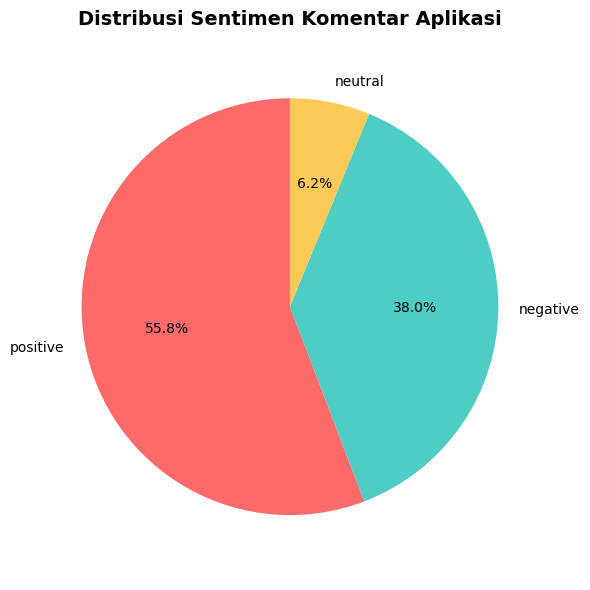

In [60]:
# Hitung jumlah masing-masing kategori
sentiment_counts = df_final['sentiment'].value_counts()

# Buat pie chart
plt.figure(figsize=(6,6))
colors = ['#ff6b6b', '#4ecdc4', '#feca57']
plt.pie(sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': 10})
plt.title('Distribusi Sentimen Komentar Aplikasi', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_11692\1636330330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x='sentiment', palette=['#ff6b6b', '#feca57', '#4ecdc4'])


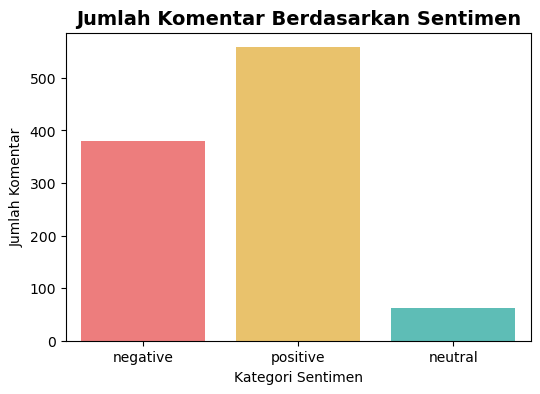

In [61]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_final, x='sentiment', palette=['#ff6b6b', '#feca57', '#4ecdc4'])
plt.title('Jumlah Komentar Berdasarkan Sentimen', fontsize=14, fontweight='bold')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Komentar')
plt.show()

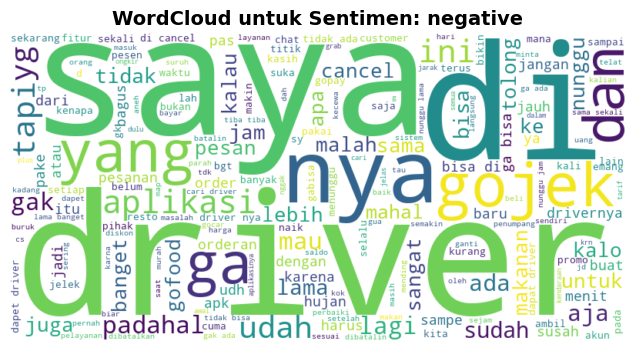

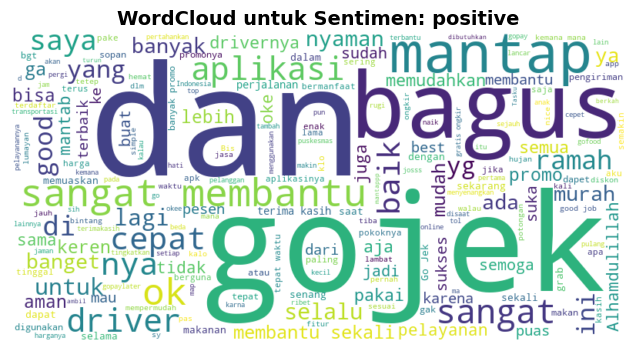

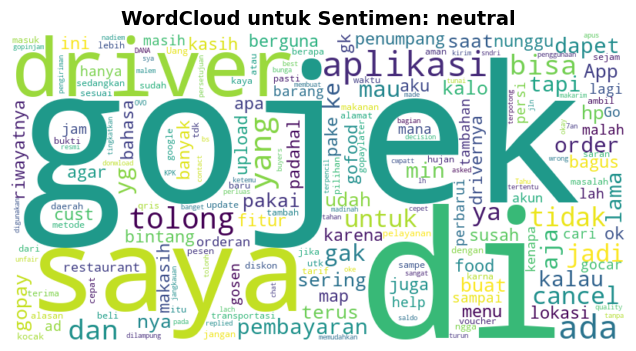

In [62]:
for label in df_final['sentiment'].unique():
    text = " ".join(df_final[df_final['sentiment'] == label]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud untuk Sentimen: {label}', fontsize=14, fontweight='bold')
    plt.show()